In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

import seaborn as sns; sns.set()

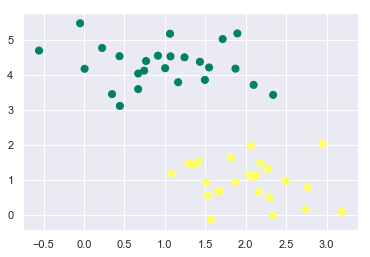

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X,y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer');

(-1, 3.5)

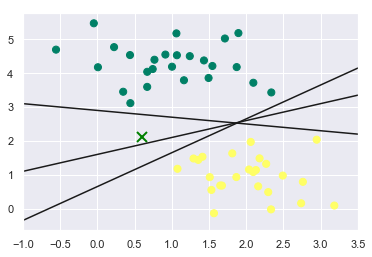

In [ ]:
xfit= np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plt.plot([0.6],[2.1],'x',color='green',markeredgewidth=2,markersize=10)

for m,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,m*xfit+b,'-k')
plt.xlim(-1,3.5)

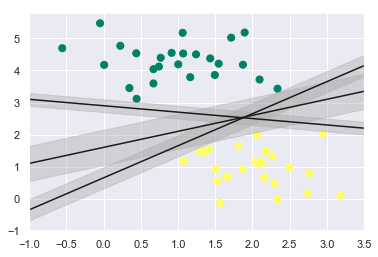

In [ ]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="summer")

for m,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yfit=m*xfit+b
    plt.plot(xfit,yfit,'k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5);

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

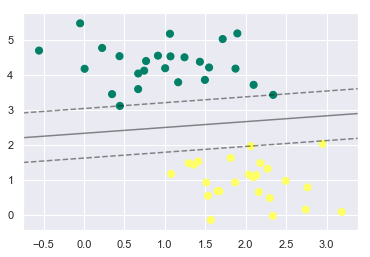

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plot_svc_decision_function(model);

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [ ]:
from sklearn.datasets import fetch_lfw_people

faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


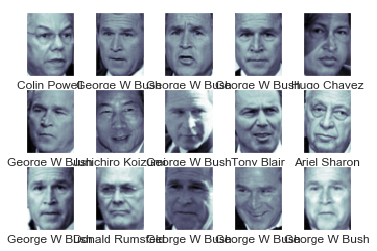

In [ ]:
fig, ax=plt.subplots(3,5)
for i,axis in enumerate(ax.flat):
    axis.imshow(faces.images[i], cmap='bone')
    axis.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

In [ ]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid={'svc__C':[1,5,10,50],
           'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid = GridSearchCV(model,param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 20.6 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

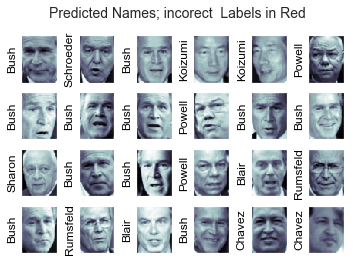

In [ ]:
fig, ax = plt.subplots(4,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axis.set(xticks=[], yticks=[])
    axis.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i]==ytest[i] else 'red')
fig.suptitle('Predicted Names; incorect  Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.80      0.88       126
Gerhard Schroeder       0.74      0.74      0.74        23
      Hugo Chavez       0.82      0.70      0.76        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.82      0.95      0.88        42

      avg / total       0.86      0.84      0.84       337



Text(0.5,12.5,'predicted Label')

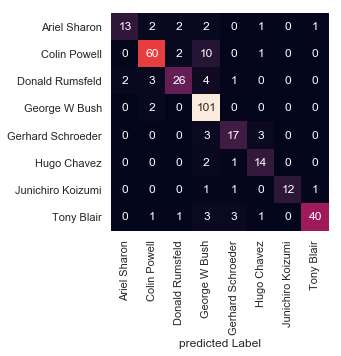

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.xlabel('predicted Label')